# county monthly

In [1]:
%reset -f

In [2]:
%pylab inline
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


In [170]:
hpi=pd.read_csv("../input/third2/HPI_po_state_monthly.csv", parse_dates=['Month']).set_index('Month')

In [171]:
for i in range(13,30):
    print (hpi.iloc[i]/hpi.iloc[i-1]).values

[1.0102284  1.0044252  1.00585766 1.0083366  1.00128751]
[0.99636292 1.01111005 1.00922062 0.9988328  0.99604352]
[0.99612258 1.00096977 1.01545427 1.00068049 0.99189522]
[0.99772525 1.00556499 1.00326484 0.99990227 1.00139359]
[1.00346947 1.00403339 1.0079441  1.00215033 0.9972167 ]
[1.00454082 1.00358062 1.00640728 1.00518915 0.99642291]
[0.99921143 1.00401232 1.00283607 1.00962286 1.00287927]
[1.00769458 1.00037175 1.00320513 1.00356214 1.000594  ]
[1.00560154 1.00459671 0.99805757 1.00676084 0.98287747]
[1.00488281 1.00286401 1.00367405 0.99990422 0.9980022 ]
[0.98688047 1.00257946 1.00168951 0.99224138 0.99659694]
[0.98258834 0.99706838 1.0159251  0.99543251 0.98432589]
[0.99553837 0.99806648 1.00344346 0.99922653 0.98967298]
[1.00328653 1.00830258 0.99489891 1.0079342  1.00450128]
[1.01464515 1.01091    1.01293802 1.01258711 0.99317974]
[1.00550531 1.00571014 1.0069776  0.99780994 0.99796851]
[1.00195542 1.00955299 1.00866156 1.00982918 1.00315522]


In [172]:
hpi.head(20)

NY          OH          IA          NC          CA
Month                                                                 
1991-01-01  100.000000  100.000000  100.000000  100.000000  100.000000
1991-02-01  100.030000  100.990000  100.610000  100.520000  100.220000
1991-03-01   99.920000  101.340000  100.410000  100.970000  100.020000
1991-04-01   99.303394  101.734251  101.482901  100.898158   99.594000
1991-05-01   99.563350  102.354094  101.301879  100.738287   99.812714
1991-06-01   99.643337  102.773988  102.056137  101.297834   99.872363
1991-07-01  100.213116  102.712266  102.616705  100.842179   99.530305
1991-08-01   99.722661  102.901736  103.092861  100.622609   99.857251
1991-09-01  100.283182  102.572658  102.981420  100.532786   99.470861
1991-10-01   99.795882  103.179220  103.140956  101.979167   99.732841
1991-11-01  100.754402  104.029544  103.201717  102.470560   99.683434
1991-12-01  100.504788  103.789452  104.214392  102.249934   99.861299
1992-01-01  100.419865  104.360615  103.418068  102.038085   99.164336
1992-02-01  101.447000  104.822432  104.023856  102.888736   99.292011
1992-03-01  101.078029  105.987015  104.983020  102.768644   98.899165
1992-04-01  100.686107  106.089798  106.605455  102.838577   98.097609
1992-05-01  100.457072  106.680186  106.953504  102.828527   98.234317
1992-06-01  100.805604  107.110469  107.803154  103.049642   97.960901
1992-07-01  101.263344  107.493991  108.493880  103.584381   97.610486
1992-08-01  101.183491  107.925290  108.801576  104.581159   97.891533

In [165]:
hpi=pd.read_csv("../input/third2/HPI_at_county_monthly.csv", parse_dates=['Month']).set_index('Month')

In [168]:
for i in range(13,30):
    print (hpi.iloc[i]/hpi.iloc[i-1]).values[:5]

[1.00128751 1.00128751 1.00128751 1.00128751 1.00128751]
[0.99604352 0.99604352 0.99604352 0.99604352 0.99604352]
[0.99189522 0.99189522 0.99189522 0.99189522 0.99189522]
[1.00139359 1.00139359 1.00139359 1.00139359 1.00139359]
[0.9972167 0.9972167 0.9972167 0.9972167 0.9972167]
[0.99642291 0.99642291 0.99642291 0.99642291 0.99642291]
[1.00287927 1.00287927 1.00287927 1.00287927 1.00287927]
[1.000594 1.000594 1.000594 1.000594 1.000594]
[0.98287747 0.98287747 0.98287747 0.98287747 0.98287747]
[0.9980022 0.9980022 0.9980022 0.9980022 0.9980022]
[0.99659694 0.99659694 0.99659694 0.99659694 0.99659694]
[1.0197529  0.99014202 1.02020575 1.03987913 1.03758709]
[0.98967298 0.98967298 0.98967298 0.98967298 0.98967298]
[1.00450128 1.00450128 1.00450128 1.00450128 1.00450128]
[0.99317974 0.99317974 0.99317974 0.99317974 0.99317974]
[0.99796851 0.99796851 0.99796851 0.99796851 0.99796851]
[1.00315522 1.00315522 1.00315522 1.00315522 1.00315522]


In [6]:
geoids=set(hpi.columns)
len(geoids)

402

In [15]:
gdf=gpd.read_file("../input/third/US_COUNTY/")

In [17]:
gdf=gdf[gdf['GEOID'].isin(geoids)]

In [18]:
gdf.shape

(402, 18)

In [110]:
state='36'

In [111]:
subdf=gdf[gdf['STATEFP']==state]

In [122]:
vd=(hpi.iloc[-1-12]/hpi.iloc[-12-12]).to_dict()

In [154]:
vd=(hpi.iloc[11+12*5]/hpi.iloc[11+12*5+1]).to_dict()

In [155]:
subdf['v']=subdf['GEOID'].map(lambda u: vd[u])

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
subdf['v'].describe()

count    62.000000
mean      1.015254
std       0.032146
min       0.929030
25%       0.993148
50%       1.011249
75%       1.029482
max       1.138754
Name: v, dtype: float64

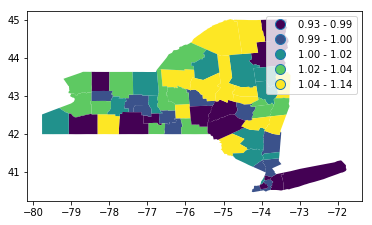

In [157]:
subdf.plot(column='v', legend=True, scheme='quantiles')

In [89]:
a=pd.read_csv("../input/third2/HPI_AT_BDL_county_5state.csv",index_col=0)

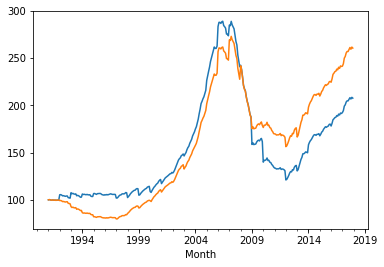

In [74]:
hpi.iloc[:,19].plot()
hpi.iloc[:,18].plot()

In [105]:
hpi.tail(14)

06001       06003       06005       06007       06009  \
Month                                                                    
2016-11-01  311.148700  156.912536  171.175332  204.396443  177.715826   
2016-12-01  310.397710  156.533812  170.762183  203.903111  177.286890   
2017-01-01  311.573945  155.907477  170.576546  201.958286  179.444818   
2017-02-01  314.847787  157.545665  172.368868  204.080349  181.330322   
2017-03-01  322.570404  161.409960  176.596748  209.086052  185.778010   
2017-04-01  324.868285  162.559789  177.854763  210.575509  187.101428   
2017-05-01  329.629090  164.942033  180.461148  213.661403  189.843320   
2017-06-01  331.680771  165.968667  181.584376  214.991276  191.024944   
2017-07-01  331.589316  165.922904  181.534307  214.931996  190.972273   
2017-08-01  334.435430  167.347062  183.092462  216.776812  192.611436   
2017-09-01  337.066102  168.663415  184.532668  218.481979  194.126518   
2017-10-01  334.762361  167.510654  183.271446  216.988724  192.799725   
2017-11-01  337.654501  168.957842  184.854798  218.863373  194.465395   
2017-12-01  336.248127  168.254111  184.084854  217.951779  193.655422   

                 06011       06013       06015       06017       06019  \
Month                                                                    
2016-11-01  201.347087  243.650723  193.201357  206.619907  192.968959   
2016-12-01  200.861115  243.062646  192.735045  206.121208  192.503209   
2017-01-01  197.961126  245.991432  192.823061  206.458579  193.999488   
2017-02-01  200.041189  248.576171  194.849136  208.627928  196.037925   
2017-03-01  204.947818  254.673271  199.628414  213.745174  200.846362   
2017-04-01  206.407796  256.487476  201.050498  215.267821  202.277123   
2017-05-01  209.432614  260.246190  203.996807  218.422479  205.241407   
2017-06-01  210.736166  261.866016  205.266526  219.781986  206.518872   
2017-07-01  210.678060  261.793812  205.209928  219.721385  206.461929   
2017-08-01  212.486362  264.040854  206.971296  221.607309  208.234043   
2017-09-01  214.157782  266.117801  208.599334  223.350474  209.872014   
2017-10-01  212.694081  264.298970  207.173623  221.823944  208.437605   
2017-11-01  214.531626  266.582349  208.963475  223.740366  210.238377   
2017-12-01  213.638075  265.472000  208.093116  222.808458  209.362707   

               ...           39157       39159       39161       39163  \
Month          ...                                                       
2016-11-01     ...      181.196698  189.767051  164.190098  184.097209   
2016-12-01     ...      180.762716  189.312542  163.796848  183.656279   
2017-01-01     ...      174.765051  186.980815  156.991256  160.786483   
2017-02-01     ...      175.928154  188.225217  158.036070  161.856555   
2017-03-01     ...      180.518887  193.136834  162.159920  166.080098   
2017-04-01     ...      183.265886  196.075843  164.627546  168.607379   
2017-05-01     ...      185.951847  198.949548  167.040343  171.078504   
2017-06-01     ...      187.574061  200.685152  168.497576  172.570965   
2017-07-01     ...      188.577060  201.758259  169.398568  173.493739   
2017-08-01     ...      188.895782  202.099258  169.684876  173.786968   
2017-09-01     ...      188.754127  201.947703  169.557628  173.656644   
2017-10-01     ...      188.293177  201.454532  169.143557  173.232562   
2017-11-01     ...      188.293177  201.454532  169.143557  173.232562   
2017-12-01     ...      186.922325  199.987860  167.912122  171.971358   

                 39165       39167       39169       39171       39173  \
Month                                                                    
2016-11-01  163.303255  203.165976  175.735165  155.674111  160.756919   
2016-12-01  162.912129  202.679375  175.314263  155.301257  160.371892   
2017-01-01  161.347052  192.253348  172.501026  147.612325  154.882817   
2017-02-01  162.420855  193.532840  173.649062  148.594721  155.913599   
2017-03-01  166.65

In [107]:
336.248127/311.573945

1.0791920582447934

In [109]:
168.254111/155.907477

1.0791920582487522